this notebook is for the capstone assignement

In [1]:
import numpy as np
import pandas as pd

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


<span style="color:blue">
below block is used to read in csv file "Data-Collisions.csv" as pd dataframe
</span>

In [3]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
# make a function to check missing data
def check_missing_data(df_name):
    missing_data=df_name.isnull()

    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")   

# check missing data in the original list
check_missing_data(df)

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

<span style="color:blue">
as above, we can see that data are missing in different columns, but some columns can be droppped directly based on what they are  
  
now start data cleaning  
</span>

In [104]:
# drop unnecessary columns

df_clean=df.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SEVERITYDESC','INCDATE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY'],axis=1)
df_clean.head(1)

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N


In [105]:
# check missig data again if necessary

# check_missing_data(df_clean)

In [106]:
# fill empty with 'N' in below columns
df_clean.fillna({'INATTENTIONIND':'N','PEDROWNOTGRNT':'N','SPEEDING':'N'},inplace=True)

# replace 'Y/N' into '1/0' in column 'UNDERINFL'
df_clean.UNDERINFL.replace('Y','1',inplace=True)
df_clean.UNDERINFL.replace('N','0',inplace=True)

In [107]:
# drop rows with empty value in any column
df_clean=df_clean.dropna()
df_clean.shape

(182895, 19)

<span style="color:blue">
datetime formating will take some time in below block, wait until it' done
</span>

In [108]:
# data standardzation
# this takes some time

# convert datetime format
df_clean['DATETIME']=pd.to_datetime(df_clean.INCDTTM)
df_clean.drop(['INCDTTM'],axis=1,inplace=True)

# replace "Y/N" into "1/0"
cols=['INATTENTIONIND','PEDROWNOTGRNT','SPEEDING']
df_clean[cols]=df_clean[cols].replace('Y','1')
df_clean[cols]=df_clean[cols].replace('N','0')

print('job done!')

job done!


In [109]:
# cut the latest 30000 samples from dataset
df_clean.sort_values(by=['DATETIME'],ascending=False,inplace=True)
df_clean=df_clean[0:30000]
df_clean.reset_index(inplace=True)
df_clean.drop('index',axis=1, inplace=True)

In [110]:
# ramdonly drop around 10000 samples of category-1
df_low=df_clean[df_clean.SEVERITYCODE==1]
drop_index=np.random.choice(df_low.index,size=10000)
df_clean.drop(drop_index,inplace=True)

In [111]:
# well, not exactly 10000 was dropped, but still works
df_clean.SEVERITYCODE.value_counts()

1    12106
2    10017
Name: SEVERITYCODE, dtype: int64

<span style="color:blue">
here we end up with around 20000 samples and 18 potential features  
    
more analysis will be done in below sections to prepare features in suitable forms for modeling
</span>

In [112]:
import seaborn as sns
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [113]:
# replace "1/2" with "Low/High" in SEVERITYCODE
df_clean.SEVERITYCODE.replace(1,'Low',inplace=True)
df_clean.SEVERITYCODE.replace(2,'High',inplace=True)

<span style="color:blue">
in the following blocks, each column will be analized and converted if necessary  
  
and it will be easier if we separate low severity and high severity data
</span>

In [114]:
df_low=df_clean[df_clean.SEVERITYCODE=='Low']
df_high=df_clean[df_clean.SEVERITYCODE=='High']

<span style="color:blue">
let's define a bar chart function to plot out each column against severity
</span>

In [147]:
def bar_chart(cloumn_name):
    plot_low=pd.DataFrame(df_low[cloumn_name].value_counts())
    plot_low.rename(columns={cloumn_name:'Low'},inplace=True)
    plot_high=pd.DataFrame(df_high[cloumn_name].value_counts())
    plot_high.rename(columns={cloumn_name:'High'},inplace=True)
    df_plot=plot_low.join(plot_high,how='outer')
    df_plot.fillna(0)
    ax=df_plot.plot(kind='bar',figsize=(10, 5))
    ax.set_title(cloumn_name,size=10)

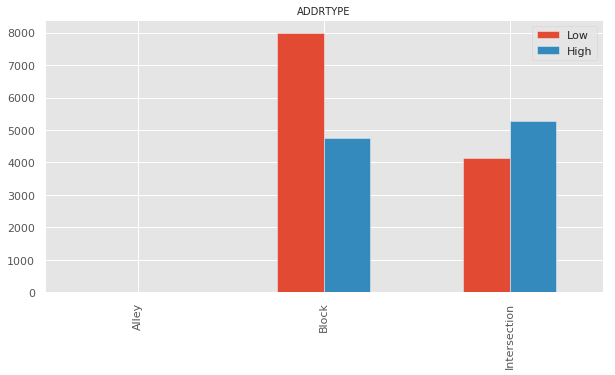

In [148]:
bar_chart('ADDRTYPE')

<span style="color:blue">
we can find that when the accident is happened at a "Block", it has a higher probability to have a lower severity  
      
as "Alley" has too few samples, let's drop it
</span>

In [143]:
df_clean.drop(df_clean[df_clean.ADDRTYPE=='Alley'].index, inplace=True)

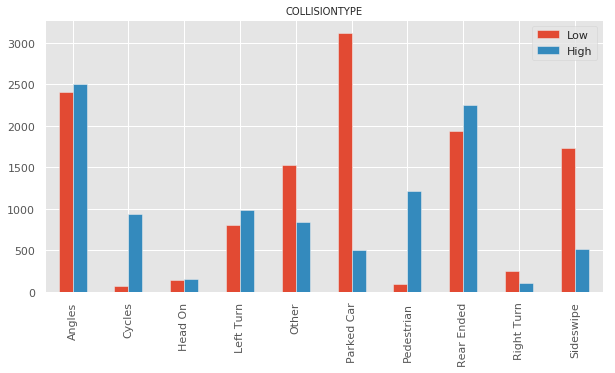

In [149]:
bar_chart('COLLISIONTYPE')

<span style="color:blue">
this chart shows that when hitting into a parked car, or if just a sideswipe, it's usually a low severity  
    
but if it involves cycles, or pedestrians, very likely it'll be a high severity
</span>

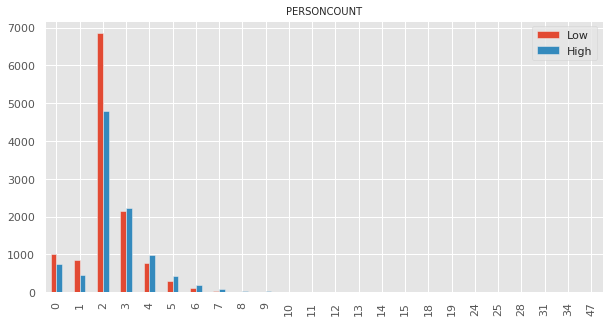

In [150]:
bar_chart('PERSONCOUNT')

<span style="color:blue">
as the number of involved people increases, it's more likely to have a higher severity  
    
since the distrubution is quite uneven, we can consider to do a bin operation. and it's easy to find out that 2 is the thredshed, let's bin them into (<=2) and (>2)
</span>